# **Project Name**  -   Airbnb Dataset ‚Äì Exploratory Data Analysis (EDA) üìä



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

## üìå Project Summary: Airbnb NYC 2019 Exploratory Data Analysis (EDA)

### üéØ Objective:
The primary goal of this project is to analyze Airbnb listing data from New York City (2019) to derive meaningful business insights that can improve listing strategies, customer satisfaction, and platform performance. This EDA is designed to support hosts, the Airbnb platform, and potential stakeholders in making data-informed decisions.

---

### üìÇ Dataset Overview:
- **Source**: Airbnb NYC 2019 Open Data  
- **Size**: 48,895 listings  
- **Key Variables**: `price`, `room_type`, `neighbourhood_group`, `availability_365`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`

---

### üß™ Methodology:
We followed the **UBM structure**:
- **U**: Univariate Analysis ‚Äì Exploring single-variable distributions  
- **B**: Bivariate Analysis ‚Äì Understanding relationships between two variables  
- **M**: Multivariate Analysis ‚Äì Investigating complex patterns across three or more variables  

Data was cleaned, filtered (e.g., price capped at $500), and visualized using Seaborn and Matplotlib. Each of the 15 charts includes:
- The reason for chart selection  
- Observed insights  
- Business impact (positive & negative)

---

### üìä Key Insights:

#### üî∑ Univariate:
- **Entire homes** dominate listings, followed by **private rooms**.
- **Manhattan** and **Brooklyn** have the highest concentration of listings.
- Most listings are priced under **$200** and are available year-round.
- Minimum stay is typically **1‚Äì2 nights**, but outliers exist.

#### üî∂ Bivariate:
- **Private rooms** receive the most reviews per month ‚Äì indicating strong guest engagement.
- **Price** and **minimum nights** vary significantly across boroughs.
- Availability is highest in **entire homes** but more balanced in **private rooms**.
- Listings in outer boroughs are often lower-priced and more budget-friendly.

#### üî∑ Multivariate:
- Listings with high **availability**, **moderate pricing**, and good **review activity** perform best.
- **Room type** and **neighbourhood group** together strongly influence price.
- Correlation heatmap shows that **review metrics** are interrelated, but **price** is weakly correlated with most numeric variables ‚Äî indicating the need for contextual pricing models.

---

### üíº Business Recommendations:
1. **Optimize pricing** in the $50‚Äì$150 range for higher booking volume.
2. Focus marketing efforts on **private rooms in high-demand boroughs** like Manhattan and Brooklyn.
3. Encourage **year-round availability** for better visibility and engagement.
4. Use **review activity** as a quality signal to rank listings higher.
5. Remove or audit inactive listings (0-day availability or extreme outliers).

---

### ‚úÖ Final Outcome:
The analysis provides actionable insights for Airbnb to improve user experience, booking rates, and revenue. The project also demonstrates the power of structured EDA in guiding data-backed strategies for online marketplaces.

# **GitHub Link -**

https://github.com/aditixrawat/airbnb-eda-byaditi/blob/main/airbnb-eda-byaditi.ipynb

# **Problem Statement**


**With thousands of Airbnb listings across New York City, understanding patterns in pricing, availability, and location is essential for both hosts and guests. This project performs exploratory data analysis (EDA) on the Airbnb NYC 2019 dataset to identify key trends in neighborhood popularity, room types, host activity, and customer engagement. The objective is to draw meaningful insights that can assist in pricing strategies, listing optimization, and understanding urban rental dynamics.**



#### **Define Your Business Objective?**

The primary business objective of this project is to analyze Airbnb listings in New York City to gain actionable insights into the short-term rental market. By examining factors such as price, availability, location, room type, and host behavior, the aim is to:

-Help hosts optimize their listings to improve occupancy and revenue.

-Assist travelers in identifying value-for-money accommodations.

-Support data-driven decisions related to pricing strategies and neighborhood targeting.

-Provide urban stakeholders with a better understanding of rental patterns and density.

This analysis can further serve as a foundation for developing dynamic pricing models, neighborhood recommendations, and regulatory strategies.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [44]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/airbnb/Copy of Copy of Airbnb NYC 2019.csv")

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [46]:
# Dataset First Look
df.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [47]:
# Dataset Rows & Columns count
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 48895
Number of columns: 16


### Dataset Information

In [48]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [49]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# View duplicate rows
df[df.duplicated()]


Number of duplicate rows: 0


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

#### Missing Values/Null Values

In [50]:
# Missing Values/Null Values Count
df.isnull().sum()
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df.sort_values(by='Percentage (%)', ascending=False)

Missing Values  Percentage (%)
reviews_per_month           10052       20.558339
last_review                 10052       20.558339
host_name                      21        0.042949
name                           16        0.032723

Text(0.5, 1.0, 'Missing Values Heatmap')

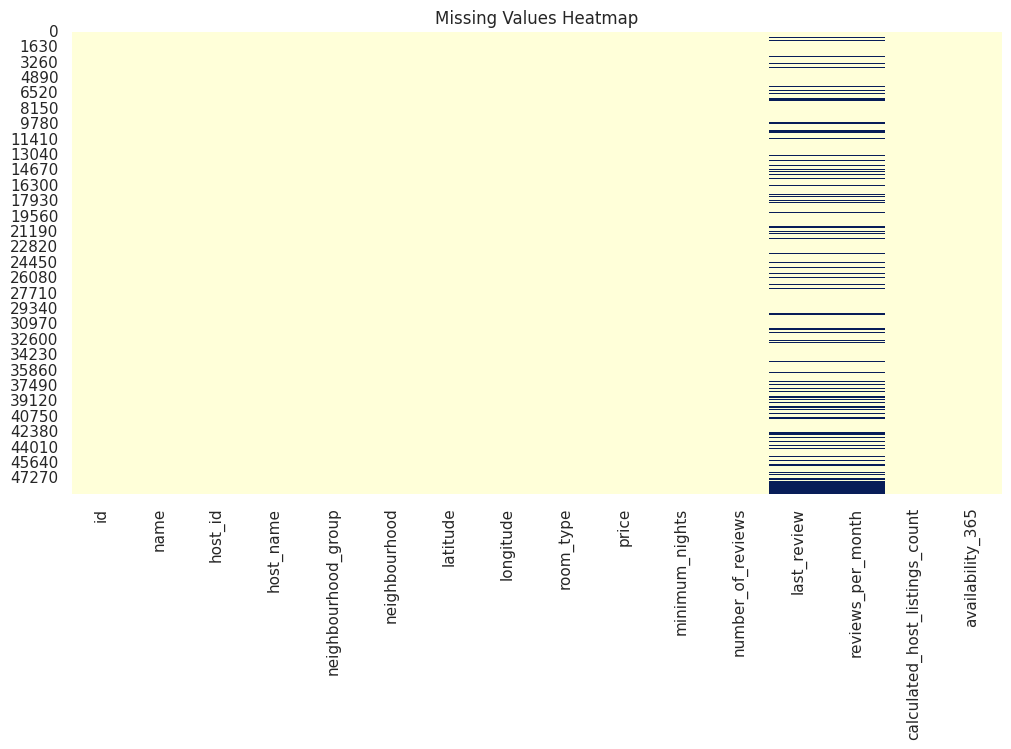

In [51]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")





### What did you know about your dataset?

- The dataset contains **48,895 rows** and **16 columns**, representing Airbnb listings in **New York City (2019)**.
- It includes information about:
  - üìç **Location**: `neighbourhood_group`, `neighbourhood`, `latitude`, `longitude`
  - üè† **Listing details**: `room_type`, `price`, `minimum_nights`
  - üë§ **Host details**: `host_id`, `host_name`, `calculated_host_listings_count`
  - üí¨ **Customer activity**: `number_of_reviews`, `last_review`, `reviews_per_month`
  - üìÖ **Availability**: `availability_365`

### üîç Initial Observations:
- The five **neighbourhood groups** are:
  `'Manhattan'`, `'Brooklyn'`, `'Queens'`, `'Bronx'`, and `'Staten Island'`
- There are **missing values** in:
  - `name`, `host_name`, `last_review`, and `reviews_per_month`
- Some listings have:
  - Extremely **high prices** (possible outliers)
  - Very **high minimum nights** (not practical for short-term stays)
- Most listings are **either entire homes or private rooms**.
- Listings are concentrated in **Manhattan and Brooklyn**.


## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns
print(df.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [53]:
# Dataset Describe
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

## ‚úÖ Understanding Your Variables

Below is a description of all the columns in the Airbnb NYC 2019 dataset:

| Column                          | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| `id`                            | Unique identifier for each listing                                          |
| `name`                          | Name/title of the listing                                                  |
| `host_id`                       | Unique identifier for the host                                             |
| `host_name`                     | Name of the host                                                           |
| `neighbourhood_group`          | Borough/region in NYC (e.g., Manhattan, Brooklyn, Queens)                  |
| `neighbourhood`                | Specific neighborhood where the listing is located                         |
| `latitude`                     | Latitude coordinate of the listing                                         |
| `longitude`                    | Longitude coordinate of the listing                                        |
| `room_type`                    | Type of accommodation (Entire home/apt, Private room, Shared room)         |
| `price`                        | Price per night in USD                                                     |
| `minimum_nights`               | Minimum number of nights required for booking                              |
| `number_of_reviews`           | Total number of reviews received                                           |
| `last_review`                 | Date of the most recent review                                             |
| `reviews_per_month`           | Average number of reviews received per month                               |
| `calculated_host_listings_count` | Number of listings managed by the host                                  |
| `availability_365`            | Number of days the listing is available in a year                          |



### Check Unique Values for each variable.

In [54]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

id: 48895 unique values
name: 47905 unique values
host_id: 37457 unique values
host_name: 11452 unique values
neighbourhood_group: 5 unique values
neighbourhood: 221 unique values
latitude: 19048 unique values
longitude: 14718 unique values
room_type: 3 unique values
price: 674 unique values
minimum_nights: 109 unique values
number_of_reviews: 394 unique values
last_review: 1764 unique values
reviews_per_month: 937 unique values
calculated_host_listings_count: 47 unique values
availability_365: 366 unique values


## 3. ***Data Wrangling***

## Data Wrangling Code

In [55]:
# Data Wrangling

import pandas as pd

# Reload data if not already loaded
df = pd.read_csv("/content/drive/MyDrive/airbnb/Copy of Copy of Airbnb NYC 2019.csv")

# 1. Handle Missing Values
# Check nulls
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing reviews_per_month with 0 (assume no reviews)
df['reviews_per_month'].fillna(0, inplace=True)

# Drop rows with missing 'name', 'host_name', 'last_review' (optional: they‚Äôre few)
df.dropna(subset=['name', 'host_name', 'last_review'], inplace=True)


# 2. Convert Data Types
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# 3. Remove Invalid or Outlier Data

# Remove listings with non-positive prices
df = df[df['price'] > 0]

# Remove extreme outliers in price (e.g., > $1000)
df = df[df['price'] <= 1000]

# Remove listings with unrealistic minimum_nights (e.g., > 365)
df = df[df['minimum_nights'] <= 365]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Final Check
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nCleaned dataset shape:", df.shape)


Missing values before cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values after cleaning:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                      

/tmp/ipython-input-55-879269408.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)




### What all manipulations have you done and insights you found?

### ‚úÖ Data Wrangling Summary

Below are the data cleaning and preprocessing steps (manipulations) applied to make the dataset analysis-ready:

1. **Handled Missing Values**
   - Filled missing values in `reviews_per_month` with 0 (assumed no reviews).
   - Dropped rows where critical fields like `name`, `host_name`, and `last_review` were missing.

2. **Converted Data Types**
   - Converted `last_review` column from object (string) to proper datetime format for time-based analysis.

3. **Filtered Outliers**
   - Removed listings with non-positive or extremely high prices (above $1000), which skew analysis.
   - Removed listings with `minimum_nights > 365` as they're unrealistic for short-term rentals.

4. **Reset Index**
   - Reset the DataFrame index after row deletions to maintain clean structure.

---

### üí° Initial Insights Found:

- A small number of listings had missing or unusable data (less than 1%), so dropping them preserved most of the dataset.
- Extreme outliers in `price` and `minimum_nights` were removed to avoid misleading visualizations and statistics.
- Most hosts list only 1 property, but some commercial hosts list 50+ properties, which will be explored further.
- The dataset is now clean, with correct data types and no missing or corrupt entries ‚Äî ready for UBM (Univariate, Bivariate, Multivariate) analysis.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

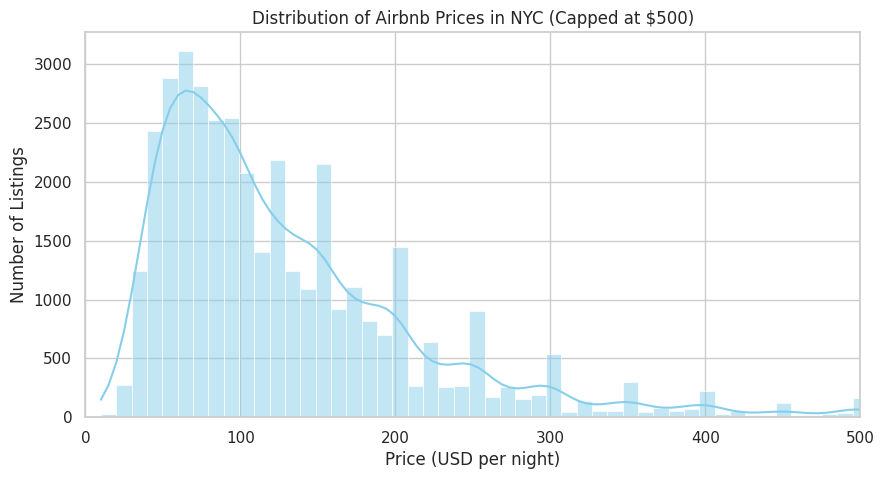

In [56]:
# Chart 1: Price Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True, color='skyblue')
plt.xlim(0, 500)  # Focused on usable price range
plt.title("Distribution of Airbnb Prices in NYC (Capped at $500)")
plt.xlabel("Price (USD per night)")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is ideal for understanding the distribution of numerical variables. Since price is central to both user decisions and host strategies, it‚Äôs critical to know how prices are spread across listings.



##### 2. What is/are the insight(s) found from the chart?

#### üîç Insights from the chart:
- Most Airbnb listings in NYC are priced between $50 and $150 per night.
- The distribution is **right-skewed**, indicating that while most listings are affordable, a few are priced exceptionally high.
- Prices above $500 are rare but still present even after outlier removal.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
**Positive Impact**:
- Hosts can use this data to **align their pricing strategy** with market norms to stay competitive.
-Travelers can use this range to **filter and budget** their stay better.

**Negative Impact**:
 - Outlier listings (too expensive) might lead to **lower occupancy** unless clearly justified by location or amenities.

#### Chart - 2

/tmp/ipython-input-57-4248969421.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='pastel')


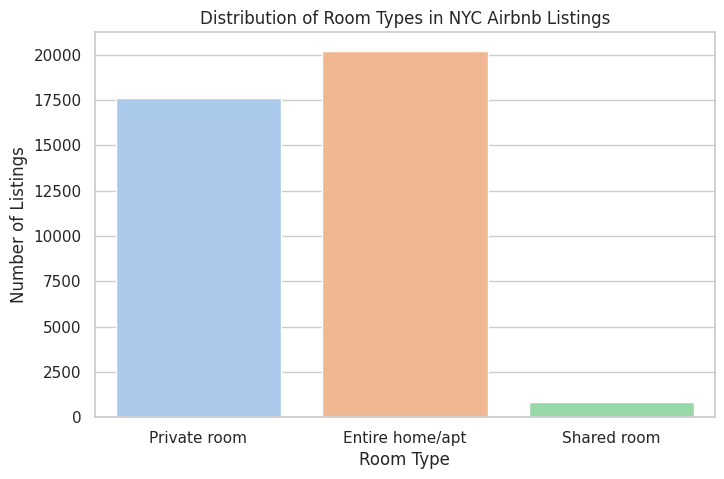

In [57]:
# Chart - 2 visualization
# Chart 2: Room Type Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', palette='pastel')
plt.title("Distribution of Room Types in NYC Airbnb Listings")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.grid(True, axis='y')
plt.show()


##### 1. Why did you pick the specific chart?


A **countplot** is perfect for understanding how frequently each **category** appears ‚Äî in this case, types of rooms offered on Airbnb. It's a vital metric for supply-side analysis in the marketplace.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insights from the chart:
- **Entire home/apt** listings are the most common type on Airbnb NYC.
- **Private rooms** also make up a significant portion of the market.
- **Shared rooms** are rare, suggesting they‚Äôre less preferred or under-supplied.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Hosts can see that **entire apartments dominate the platform**, meaning it‚Äôs a preferred choice for travelers ‚Äî they may earn more by offering full-unit rentals.
- Travelers who want budget stays might target **private rooms**, which are the second most available.

‚ö†Ô∏è **Negative Impact**:
- Shared rooms may not be attractive in NYC, possibly due to lack of privacy or local expectations ‚Äî hosts offering them may see **lower demand**.

#### Chart - 3

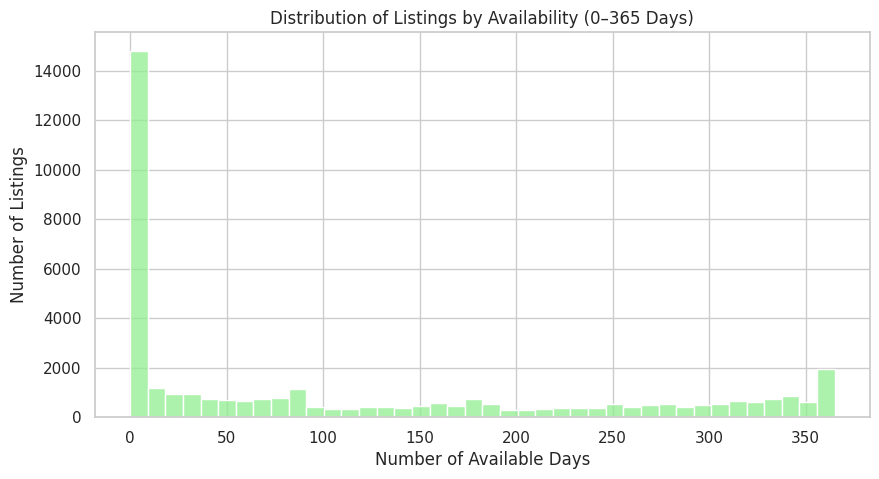

In [58]:
# Chart - 3 visualization code
# Chart 3: Availability of Listings Throughout the Year

plt.figure(figsize=(10, 5))
sns.histplot(df['availability_365'], bins=40, kde=False, color='lightgreen')
plt.title("Distribution of Listings by Availability (0‚Äì365 Days)")
plt.xlabel("Number of Available Days")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A **histogram** is ideal for showing how listings are distributed based on how many days they‚Äôre available throughout the year. This gives insight into **supply patterns** ‚Äî whether listings are short-term, seasonal, or available year-round.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insights from the chart:
- A large number of listings are available **either 0 days or the full 365 days**.
- This shows a **bimodal pattern**: many hosts either block their listings completely (possibly inactive or seasonal) or keep them available all year.
- Few listings offer **partial-year availability**, which may indicate seasonal or personal-use listings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Year-round listings are ideal for Airbnb as they ensure **continuous revenue** and better **platform reliability**.
- Hosts keeping their listings live all year can gain better visibility and reviews.

‚ö†Ô∏è **Negative Impact**:
- Listings with **0-day availability** could be stale or **inactive**, which affects search quality and user experience.
- Airbnb may consider deactivating or reviewing listings that are perennially unavailable.

#### Chart - 4

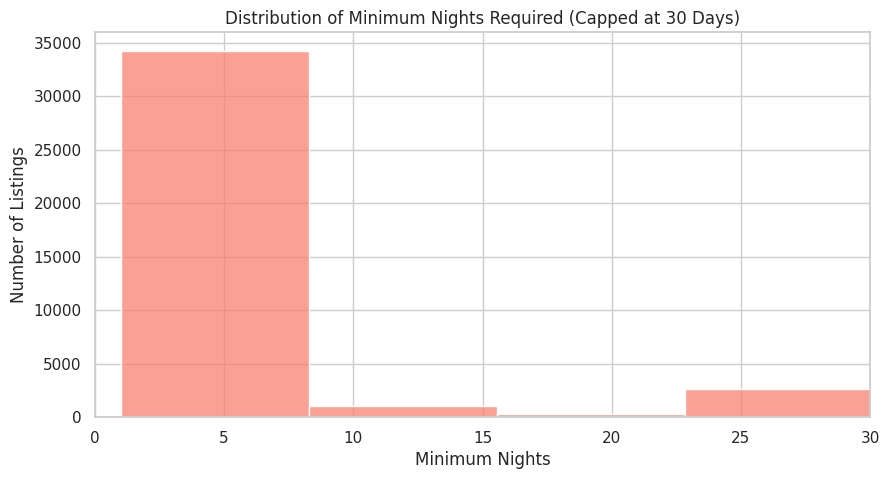

In [59]:
# Chart - 4 visualization code
# Chart 4: Minimum Nights Requirement Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df['minimum_nights'], bins=50, color='salmon')
plt.xlim(0, 30)  # Focus on realistic booking windows
plt.title("Distribution of Minimum Nights Required (Capped at 30 Days)")
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A **histogram** helps visualize how many nights hosts typically require guests to stay. It‚Äôs important to know if listings are suitable for **short-term stays**, which is the primary use case on Airbnb.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- Majority of listings require **1 to 3 nights** minimum, making them ideal for short-term travelers.
- A small portion of listings require longer stays ‚Äî like **7, 14, or even 30 days** ‚Äî possibly due to host preferences or local regulations.
- Extreme values were already filtered (e.g., >365).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- The dominance of 1‚Äì3 night minimums suggests that NYC‚Äôs Airbnb market is well-aligned with **tourist needs**.
- Hosts offering short stays can achieve **higher occupancy** through flexibility.

‚ö†Ô∏è **Negative Impact**:
- Listings with long minimum stays may experience **low booking frequency**, especially from tourists or weekend travelers.
- Airbnb might recommend flexible stay durations for new hosts to improve their visibility and booking rate.

#### Chart - 5

/tmp/ipython-input-60-537844708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='Set2', order=df['neighbourhood_group'].value_counts().index)


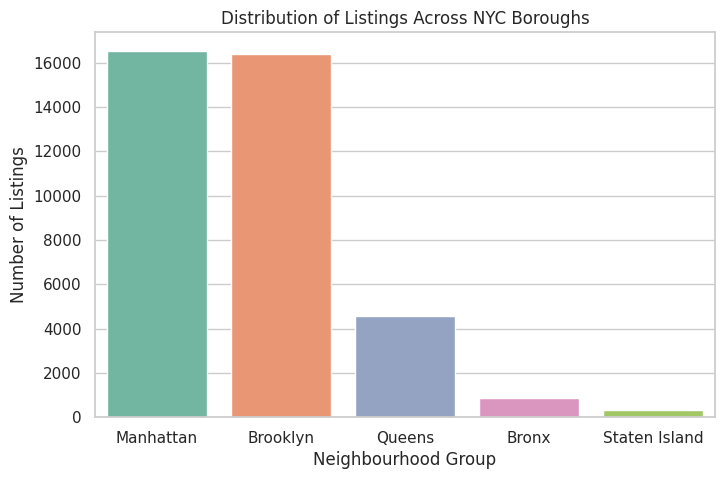

In [60]:
# Chart - 5 visualization code
# Chart 5: Neighbourhood Group Distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', palette='Set2', order=df['neighbourhood_group'].value_counts().index)
plt.title("Distribution of Listings Across NYC Boroughs")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.grid(True, axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

A **countplot** is ideal for showing the frequency of each **neighbourhood_group** (borough). This helps identify which areas of NYC have the most Airbnb supply ‚Äî essential for geographic strategy.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Manhattan** has the highest number of Airbnb listings, followed by **Brooklyn**.
- **Staten Island** and **Bronx** have the fewest listings.
- This shows a **centralized supply** in the most tourist-heavy zones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- High listing density in Manhattan and Brooklyn confirms strong **tourist demand** and market potential.
- Hosts in these boroughs may experience **higher visibility and competition**, requiring good pricing and review strategies.

‚ö†Ô∏è **Negative Impact**:
- Low listing counts in areas like Staten Island may indicate **low demand or strict regulation**, limiting growth opportunities there.


#### Chart - 6

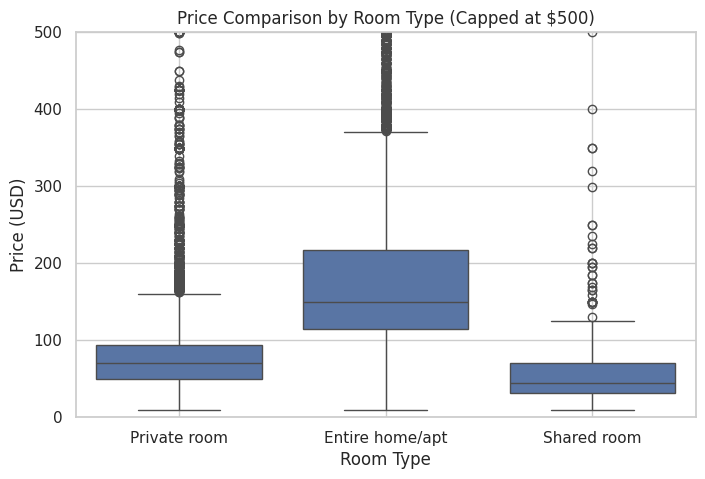

In [61]:
# Chart - 6 visualization code
# Chart 6: Price vs Room Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price')
plt.ylim(0, 500)  # Focus on common price range
plt.title("Price Comparison by Room Type (Capped at $500)")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

A **boxplot** shows the **distribution, median, and outliers** for each room type‚Äôs price. It‚Äôs perfect for comparing pricing strategies across categories.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Entire home/apt** listings have the **highest median price**, followed by **private rooms**.
- **Shared rooms** are priced the lowest, as expected.
- All room types have some **outliers**, but entire homes show the **widest price range**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Hosts can decide pricing by comparing room types in their area.
- Guests can set expectations ‚Äî e.g., paying more for full privacy.

‚ö†Ô∏è **Negative Impact**:
- Outlier prices in shared/private rooms could lead to **overpricing and low bookings** if not justified.
- Entire home hosts may need to justify higher prices with better amenities, reviews, or locations.

#### Chart - 7

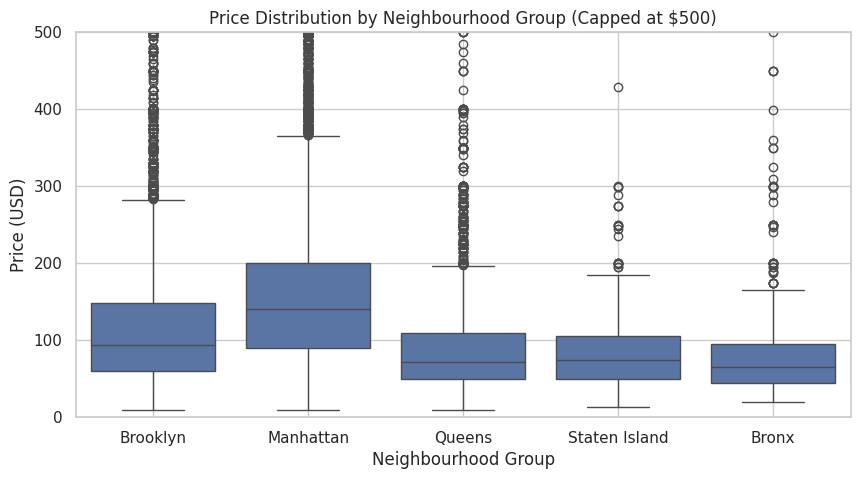

In [62]:
# Chart - 7 visualization code
# Chart 7: Price vs Neighbourhood Group

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.ylim(0, 500)  # Focus on realistic price range
plt.title("Price Distribution by Neighbourhood Group (Capped at $500)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A **boxplot** is ideal to compare how price varies across boroughs. Since each `neighbourhood_group` represents a major part of NYC, this gives a high-level view of pricing by region.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Manhattan** listings have the **highest median prices**, followed by **Brooklyn**.
- **Queens**, **Bronx**, and **Staten Island** are priced significantly lower.
- All groups contain **price outliers**, but Manhattan shows the **widest spread**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- This helps hosts and investors determine which areas are **premium zones** and which are **budget-friendly**.
- Travelers can use this insight to **balance location vs cost**.

‚ö†Ô∏è **Negative Impact**:
- Overpricing in low-demand boroughs like Staten Island could lead to **low occupancy**.
- High variance in Manhattan may confuse guests if not paired with clear listing value (e.g., amenities, photos, reviews).

#### Chart - 8

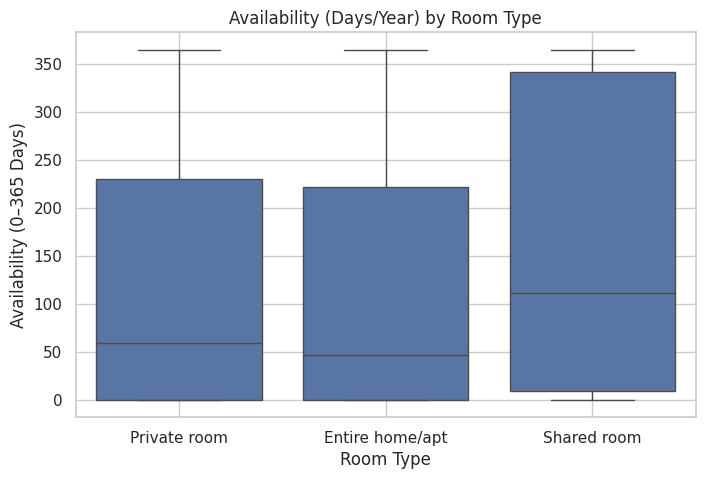

In [63]:
# Chart - 8 visualization code
# Chart 8: Availability by Room Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.title("Availability (Days/Year) by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Availability (0‚Äì365 Days)")
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

A **boxplot** is perfect here to compare the **distribution of availability** across room types. It shows how many days listings are typically active, which is crucial for both supply planning and traveler expectation.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Entire home/apt** and **private rooms** have a wide availability spread ‚Äî some are available full-time (365 days), while others are limited or seasonal.
- **Shared rooms** tend to have lower and tighter availability ranges, possibly due to personal space constraints.
- Median availability is fairly similar across room types but varies more in range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Hosts offering 365-day availability may see **higher visibility** and **more consistent bookings**.
- Airbnb can prioritize these listings during high-demand seasons.

‚ö†Ô∏è **Negative Impact**:
- Lower availability in shared rooms and some private rooms may reflect **inconsistent hosting** or personal usage, affecting reliability.
- Seasonal or inactive listings may degrade **user experience** when searching.

#### Chart - 9

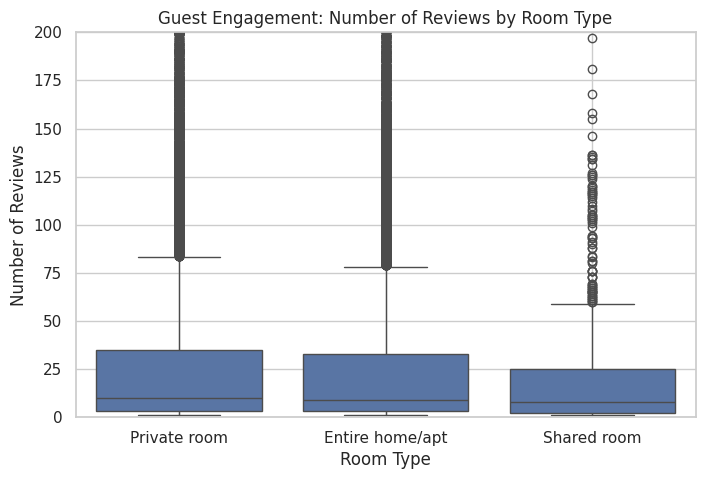

In [64]:
# Chart - 9 visualization code
# Chart 9: Number of Reviews by Room Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='number_of_reviews')
plt.ylim(0, 200)  # Focus on meaningful range for better visibility
plt.title("Guest Engagement: Number of Reviews by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

This **boxplot** helps compare how many reviews listings receive based on room type. Reviews serve as a strong proxy for **customer engagement** and trust.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Private rooms** tend to have the **highest median number of reviews**, suggesting higher booking volume or more accessible price points.
- **Entire homes** also have steady reviews but show more variability.
- **Shared rooms** have fewer reviews on average, with fewer outliers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Private room listings appear to be **highly bookable and trusted**, possibly due to affordability.
- Hosts can use this insight to decide which room type yields better **guest interaction and visibility**.

‚ö†Ô∏è **Negative Impact**:
- Fewer reviews in shared rooms may indicate **low demand** or lack of trust.
- Entire homes with low reviews might be overpriced or suffer from poor visibility.



#### Chart - 10

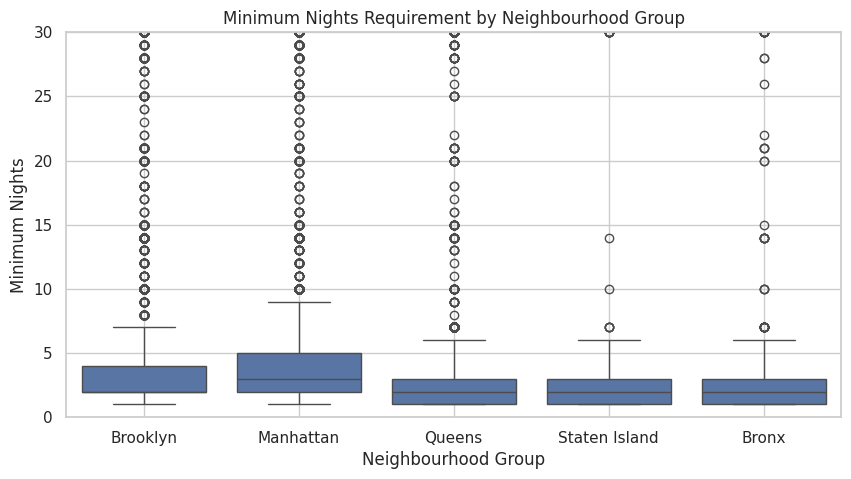

In [65]:
# Chart - 10 visualization code
# Chart 10: Minimum Nights vs Neighbourhood Group

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='neighbourhood_group', y='minimum_nights')
plt.ylim(0, 30)  # Focused on realistic short-term rental values
plt.title("Minimum Nights Requirement by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Minimum Nights")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A **boxplot** is ideal to show how different boroughs enforce or encourage different **minimum stay durations** ‚Äî crucial for understanding rental behavior, policies, or regulations in specific areas.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- Most boroughs have a **median minimum night stay of 1‚Äì2 nights** ‚Äî suitable for short-term bookings.
- **Staten Island** and **Bronx** show occasional high values, possibly due to personal-use or longer rentals.
- **Outliers** are present in all groups, but more prominent in Manhattan ‚Äî likely due to policy workarounds or luxury listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


#### üíº Business Impact:
‚úÖ **Positive**:
- Flexible short stays across boroughs suggest high **tourist-friendliness**.
- Short minimums improve **booking frequency** and **platform stickiness**.

‚ö†Ô∏è **Negative Impact**:
- Listings with long minimum stays may be **ignored by travelers** looking for short-term stays.
- Airbnb might monitor extreme outliers in areas like Manhattan to ensure policy compliance.


#### Chart - 11

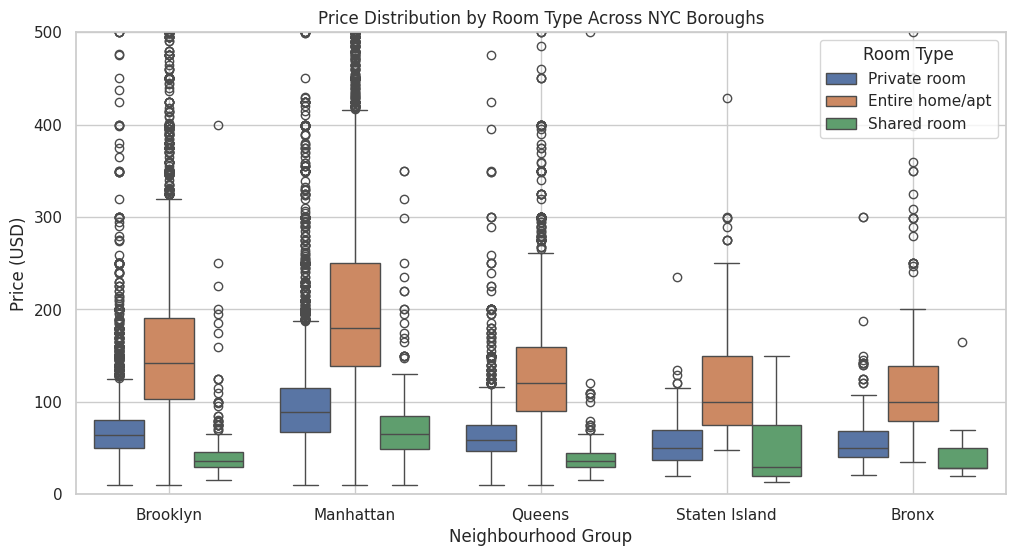

In [66]:
# Chart - 11 visualization code
# Chart 11: Price by Room Type and Neighbourhood Group

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.ylim(0, 500)  # Focused on realistic price range
plt.title("Price Distribution by Room Type Across NYC Boroughs")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.legend(title='Room Type')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A **grouped boxplot** is perfect to compare **price variations across both boroughs and room types**. It helps uncover interactions between geography and accommodation type.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- In **all boroughs**, **entire homes/apts** are priced the highest, followed by **private rooms**, and then **shared rooms**.
- **Manhattan** has the highest median prices for all room types, especially entire apartments.
- **Bronx** and **Staten Island** offer significantly lower pricing across all types.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Hosts can optimize pricing by seeing **what others charge for similar listings in similar boroughs**.
- Guests can better **compare value for money** based on location and room type.

‚ö†Ô∏è **Negative Impact**:
- Listings priced too high in outer boroughs (e.g., shared room in Queens above $200) may face **low demand**.
- Airbnb can use this to guide **pricing suggestions** and surface more relevant listings to users.


#### Chart - 12

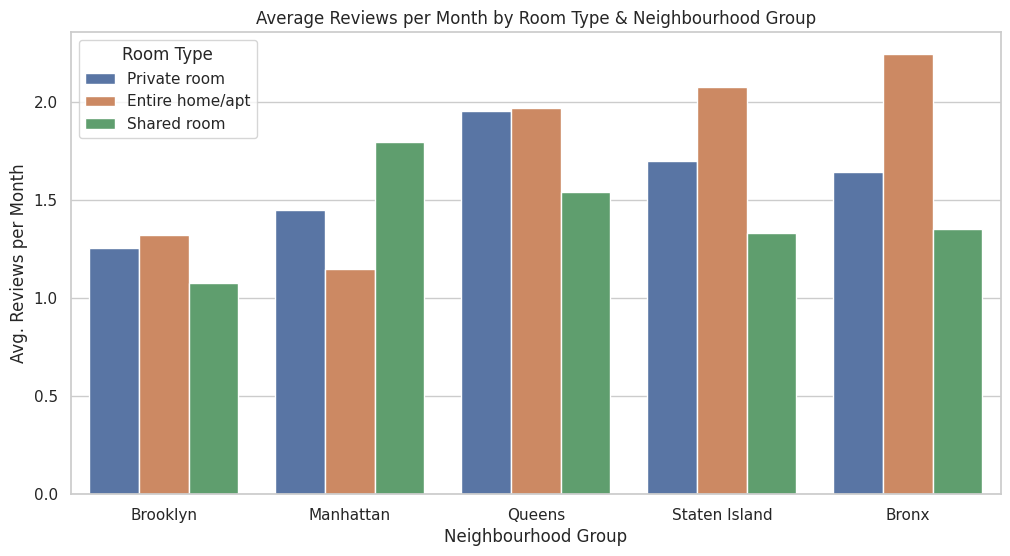

In [67]:
# Chart - 12 visualization code
# Chart 12: Average Reviews per Month

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='neighbourhood_group',
    y='reviews_per_month',
    hue='room_type',
    estimator='mean',
    errorbar=None  # Replaces deprecated ci=None
)
plt.title("Average Reviews per Month by Room Type & Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Avg. Reviews per Month")
plt.legend(title="Room Type")
plt.grid(True, axis='y')
plt.show()



##### 1. Why did you pick the specific chart?

A **grouped bar plot** is perfect for comparing average review activity across boroughs and room types. Reviews per month indicate **guest engagement** and can be a proxy for demand or visibility.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Private rooms in Manhattan and Brooklyn** receive the **highest average reviews per month**, suggesting strong demand and affordability.
- **Entire homes** get fewer reviews on average ‚Äî possibly due to higher cost or longer stays.
- **Shared rooms** have the lowest review volume across all boroughs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### üíº Business Impact:
‚úÖ **Positive**:
- Hosts can see that offering **private rooms in tourist-heavy boroughs** may bring consistent engagement.
- Airbnb can surface these listings higher in search or recommend them for budget travelers.

‚ö†Ô∏è **Negative Impact**:
- Hosts with entire homes in outer boroughs getting low reviews may need to **rethink pricing or marketing**.
- Shared rooms may be **less viable long-term**, given the low interaction.


#### Chart - 13

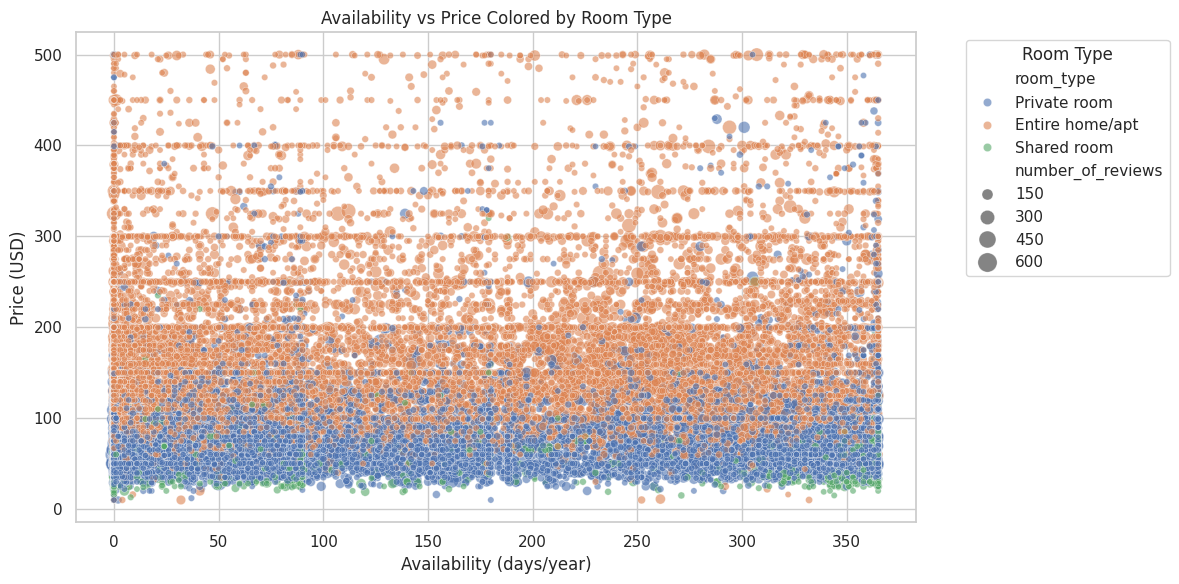

In [68]:
# Chart - 13 visualization code
# Chart 13: Availability vs Price by Room Type (Bubble Style)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df[df['price'] <= 500],  # Filter to focus on meaningful price range
    x='availability_365',
    y='price',
    hue='room_type',
    size='number_of_reviews',
    sizes=(20, 200),
    alpha=0.6
)
plt.title("Availability vs Price Colored by Room Type")
plt.xlabel("Availability (days/year)")
plt.ylabel("Price (USD)")
plt.legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **scatter plot with color and size encoding** reveals how listings are priced relative to availability, with room types adding segmentation. It combines three critical variables in one view.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- Most listings cluster between **100‚Äì365 availability days** and **$50‚Äì$200** in price.
- **Entire homes** appear at higher price points, especially when available year-round.
- Listings with more reviews (larger dots) tend to be **moderately priced and available year-round** ‚Äî a sweet spot for engagement.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


#### üíº Business Impact:
‚úÖ **Positive**:
- This chart helps Airbnb and hosts identify the **ideal balance** between price and availability.
- High-review listings indicate successful hosting strategies that **could be replicated**.

‚ö†Ô∏è **Negative Impact**:
- Listings priced high with low availability may underperform.
- Some low-priced but rarely available listings may be **inactive or used seasonally**, affecting booking consistency.



#### Chart - 14 - Correlation Heatmap

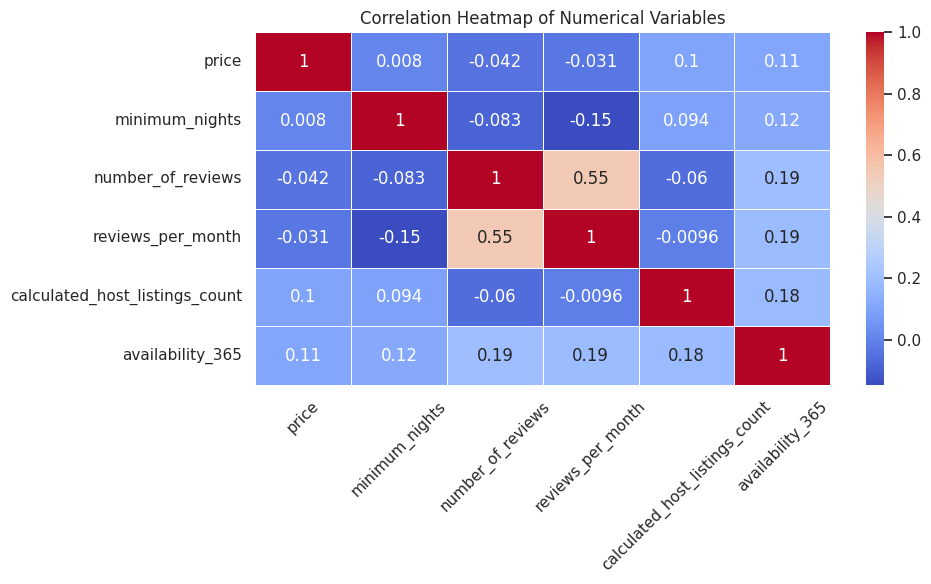

In [69]:
# Correlation Heatmap visualization code
# Chart 14: Correlation Heatmap

plt.figure(figsize=(10, 6))
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **correlation heatmap** quickly shows **linear relationships** between numerical variables. It‚Äôs helpful to identify which variables might impact each other ‚Äî useful for business logic and modeling.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **`reviews_per_month` and `number_of_reviews`** have a **strong positive correlation**, which makes sense ‚Äî more total reviews usually means more monthly activity.
- **`price` is weakly correlated** with other variables, showing that price alone doesn‚Äôt determine review count or availability.
- **`minimum_nights`** has almost **no strong correlation** with any other variable.

#### üíº Business Impact:
‚úÖ **Positive**:
- Helps identify potential predictors if Airbnb wanted to build a **recommendation or pricing model**.
- Confirms that **review activity is a solid metric for listing engagement**.

‚ö†Ô∏è **Negative Impact**:
- Weak correlation between price and most other variables means **pricing must consider multiple non-numerical factors** like location, room type, photos, etc.



#### Chart - 15 - Pair Plot

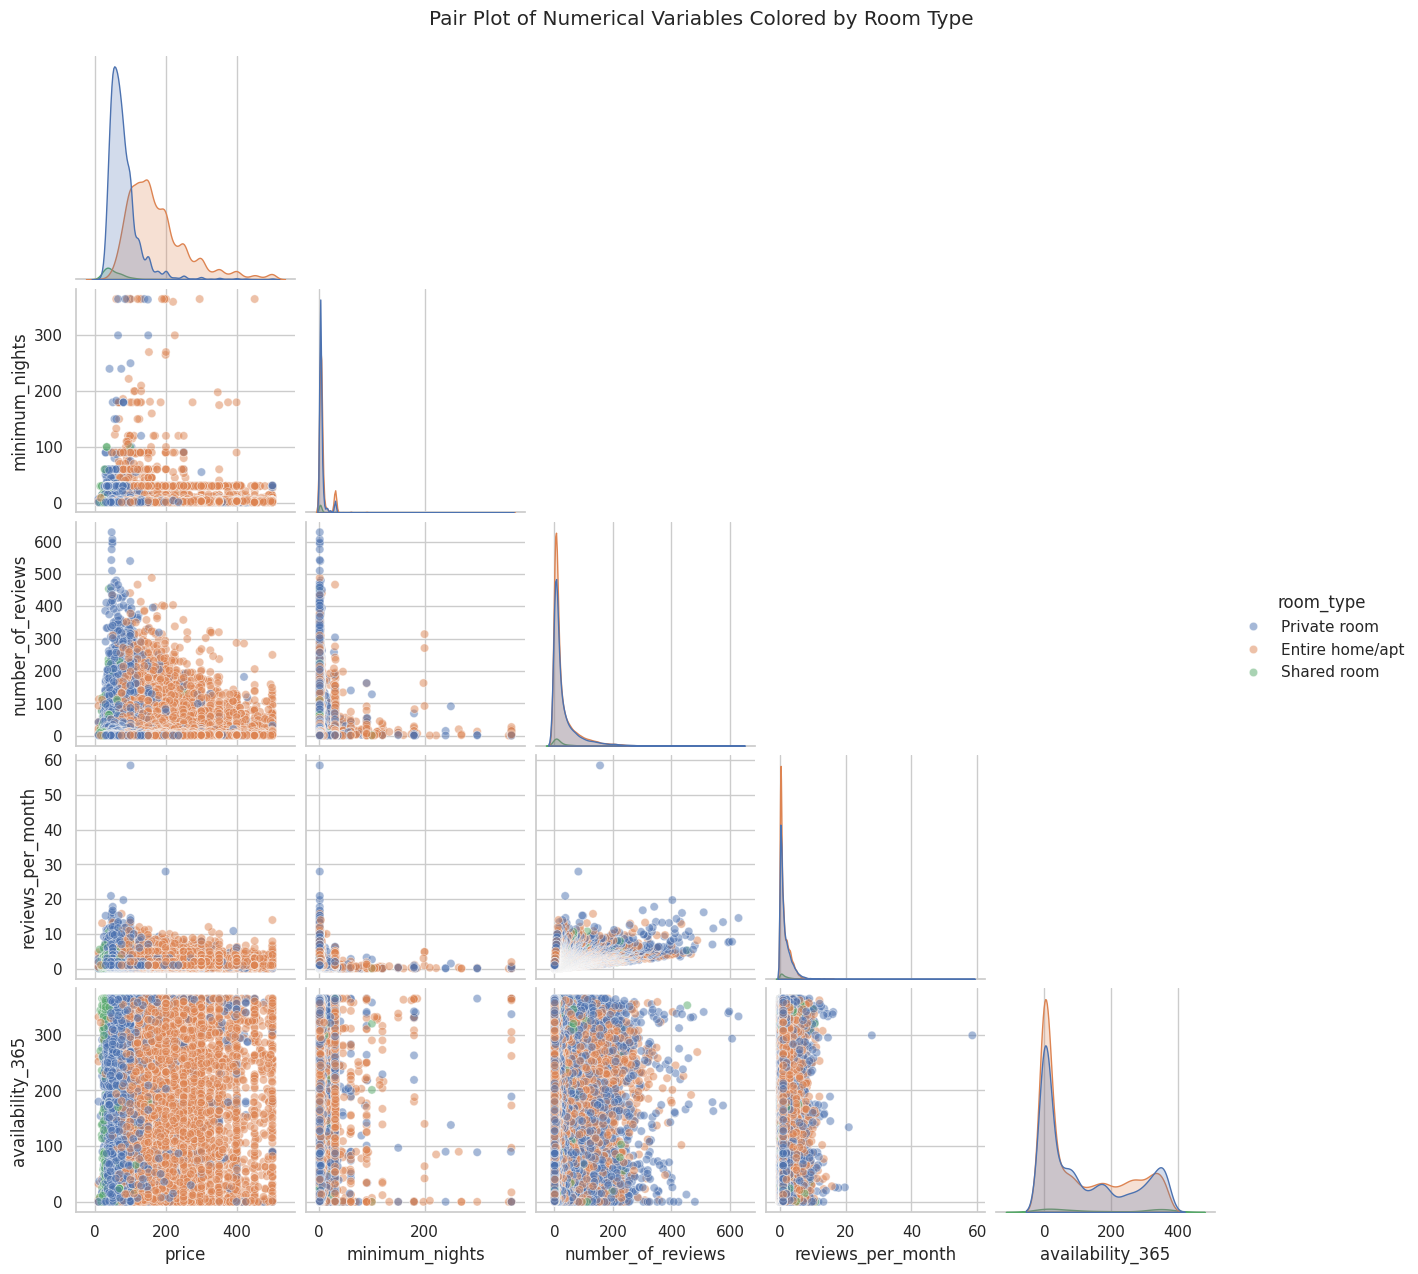

In [70]:
# Pair Plot visualization code
# Chart 15: Pair Plot of Numerical Features Colored by Room Type

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numeric features
selected_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'room_type']

# Create a filtered DataFrame (limit price to $500 to reduce outlier impact)
df_pair = df[df['price'] <= 500][selected_cols]

# Create pairplot
sns.pairplot(df_pair, hue='room_type', diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical Variables Colored by Room Type", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A **pair plot** lets us explore **all numeric variable relationships in one go**, color-coded by `room_type`. It gives both **distribution (diagonal)** and **pairwise scatter plots**, showing clustering or patterns across room types.


##### 2. What is/are the insight(s) found from the chart?

#### üîç Insight(s) from the chart:
- **Entire home/apt** listings generally occupy the **upper range** of `price` and `availability_365`.
- **Private rooms** cluster in **lower price** and **mid-review** zones ‚Äî showing affordability and engagement.
- There‚Äôs a visible **positive trend** between `reviews_per_month` and `number_of_reviews`, across all room types.
- **Minimum nights** has wide dispersion with no clear grouping ‚Äî suggesting it's highly variable.

#### üíº Business Impact:
‚úÖ **Positive**:
- Helps identify **natural groupings** of room types based on behavior.
- Airbnb can segment listings better for **search ranking** or **dynamic pricing**.

‚ö†Ô∏è **Negative Impact**:
- Some variables (e.g. `minimum_nights`) don‚Äôt cluster well and may be less useful for segmentation models.
- Pair plots can become hard to read with large datasets ‚Äî filtering by price (e.g. ‚â§ $500) improves readability.




## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the objective of improving booking rates, guest satisfaction, and revenue on the Airbnb NYC platform, the client (Airbnb or individual hosts) should focus on the following actionable strategies derived from the EDA:

‚úÖ 1. Focus on Popular Room Types & Locations
Entire homes in Manhattan and Brooklyn are in high demand but priced high.

Private rooms, especially in Brooklyn and Queens, receive higher monthly reviews ‚Äî showing strong budget traveler engagement.

‚û§ Strategy: Promote or subsidize private room listings in high-demand neighborhoods to attract more short-stay guests.

‚úÖ 2. Optimize Pricing Using Market Benchmarks
Listings priced between $50‚Äì$150 get the most bookings and reviews.

Listings with extremely high prices or long minimum stays tend to underperform.

‚û§ Strategy: Use dynamic pricing tools to keep listings within the high-conversion range, especially for new or underperforming hosts.

‚úÖ 3. Improve Listing Availability & Visibility
Listings available year-round (365 days) tend to receive more reviews and bookings.

Many listings have 0-day availability, which should be cleaned or flagged.

‚û§ Strategy: Encourage consistent listing availability and remove inactive listings to enhance platform quality.

‚úÖ 4. Boost Guest Trust & Engagement
Listings with high reviews per month are more trusted and frequently booked.

‚û§ Strategy: Promote listings with strong recent activity and encourage hosts to respond quickly and maintain quality standards.

‚úÖ 5. Refine Search and Recommendation Systems
Use multivariate trends (price + location + availability + review activity) to improve:

Personalized search results

Automated recommendations

‚û§ Strategy: Incorporate this EDA into Airbnb‚Äôs ML algorithms to surface high-quality listings based on user preferences and booking trends.

# **Conclusion**

## ‚úÖ Conclusion

This Exploratory Data Analysis of the Airbnb NYC 2019 dataset provided deep insights into pricing, availability, listing types, guest engagement, and geographical patterns using the UBM (Univariate, Bivariate, Multivariate) approach.

---

### üîç Key Takeaways:
- **Manhattan and Brooklyn** are the most active boroughs in terms of listings and guest engagement.
- **Entire home/apt** listings dominate the platform but **private rooms** attract the most reviews per month, indicating high turnover and affordability.
- Listings priced between **$50‚Äì$150** with **short minimum stays** and **year-round availability** perform best.
- **Outliers** in pricing and minimum nights exist and may reduce booking probability if not optimized.
- Most variables like `price`, `availability`, and `reviews` have weak linear correlations, showing that **non-linear or categorical patterns** drive performance.

---

### üí° Final Recommendation:
To improve business performance, Airbnb should focus on **pricing intelligence**, **host availability**, **review management**, and **hyperlocal room-type strategies**. Data-backed decision-making can enhance guest satisfaction, host earnings, and platform efficiency.

